In [224]:
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.models import Sequential
import matplotlib.pyplot as plt
from keras.src.optimizers import Adam

# Build Model

In [225]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(12, 28, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(31, activation='softmax'))

In [226]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_130 (Conv2D)             │ (None, 12, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 12, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │     1,376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,390,527 (5.30 MB)

 Trainable params: 1,390,527 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

In [227]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [228]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/home/minhpn/Desktop/Green_Parking/dataset_vietnam_licenses_plate_train'
test_dir = '/home/minhpn/Desktop/Green_Parking/dataset_vietnam_license_plate_val'

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

Found 3100 images belonging to 31 classes.
Found 620 images belonging to 31 classes.


In [229]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0800 - loss: 3.4189 - val_accuracy: 0.1226 - val_loss: 3.3074
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1499 - loss: 3.2767
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2486 - loss: 3.0518 - val_accuracy: 0.3597 - val_loss: 2.8729
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3937 - loss: 2.8023
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4598 - loss: 2.3492 - val_accuracy: 0.4823 - val_loss: 2.0746
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5433 - loss: 1.9266
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6407 - loss: 1.7447 - val_accuracy: 0.6952 - val_loss: 1.3210
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7638 - loss: 1.1534
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7434 - loss: 1.1438 - val_accuracy: 0.8306 - val_loss: 0.7440
Epoch 10/15
20/20 ━━━━━━━━━━━

78/78 - 0s - 3ms/step - accuracy: 0.8823 - loss: 0.4195


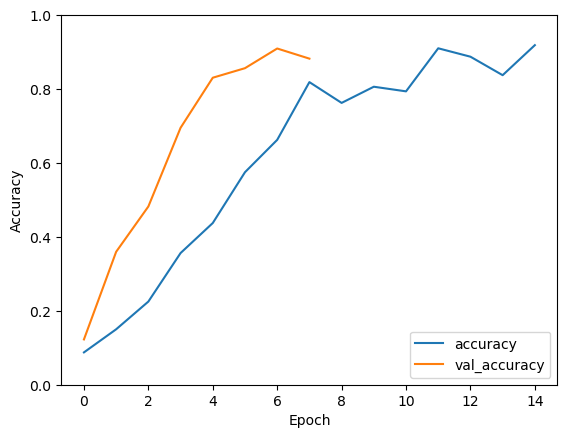

In [230]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [231]:
print(test_acc)

0.8822580575942993


In [232]:
model.save("CNN_Model.keras")